In [1]:
import cv2
import numpy as np

from skimage import data
from skimage.util import invert

from matplotlib import pyplot as plt

In [2]:
images = list()
images.append(np.array(invert(data.horse())).astype('uint8'))
images.append(np.array(invert(data.checkerboard())).astype('uint8'))
images.append(np.array(data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, rng=1)).astype('uint8'))

In [3]:
def print_img(img, skeleton, restored):
    images = [img, skeleton, restored]
    titles = ['original', 'skeleton', 'restored']
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1),plt.imshow(255 - images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

In [4]:
def skeletonize(img, kernel):
    y1 = img
    skeletons = list()
    while True:
        y2 = cv2.erode(y1, kernel=kernel, iterations=1)
        y3 = cv2.dilate(y2, kernel=kernel, iterations=1)
        sn = cv2.subtract(y1, y3)
        skeletons.append(sn)
        if not np.count_nonzero(y2):
            break
        y1 = y2
    
    skelet = skeletons[0]
    for sn in skeletons:
        skelet = np.bitwise_or(skelet, sn)
    return skelet, skeletons

def restore(skelet, sn, kernel):
    result = np.zeros(sn[0].shape).astype('uint8')
    for n in range(len(sn) - 1, -1, -1):
        result = np.bitwise_or(result, sn[n])
        result = cv2.dilate(result, kernel=kernel, iterations=1)
    return result
    

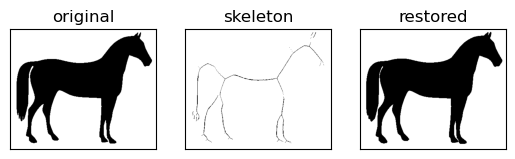

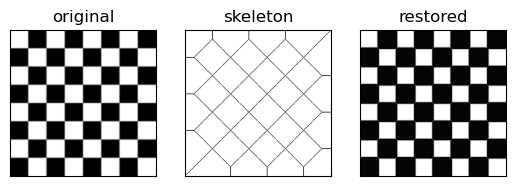

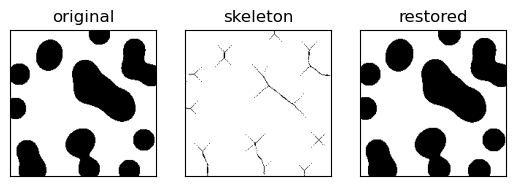

In [5]:
morph_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

for image in images:
    skelet, skeletons = skeletonize(image, morph_kernel)
    restored = restore(skelet, skeletons, morph_kernel)
    print_img(image, skelet, restored)